# CODE POUR LA PREDICTION DES NOUVEAUX DONNEES

# Packages


In [3]:
import os
import numpy as np
import librosa 
from thinkdsp import read_wave
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import time

C:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Model


In [4]:
from joblib import load

In [57]:
try :
    model=load("modelSVM")
except :
    print ('ERREUR DU MODEL')


## LES FONCTIONS à UTILISER


In [43]:
def get_sound_data_with_sample_rate(sound):
    signal , sr = librosa.load(sound) #Chargement de fichier audio avec librosa
    return signal

def get_spectrum(sound):
    s = read_wave(str(sound)) 
    return s.make_spectrum() # Extraction des fréquence présent 

def filtrage(y): # application du filtre passe bas pour atténue les haute fréquence
    order = 4
    b, a = butter(order, cutoff / (22050 / 2), btype='low')
    sound = lfilter(b, a, y)
    return sound 

def normalisation(samples):  # Fonction de normalisation de l'amplitude
    max_value = np.max(np.abs(samples)) # rechercher la valeur de l'amplitude maximal dans un données echantillonées
    normalized_samples = samples / max_value # Diviser tous l'ampllitude par la valeur maximal pour que tous les amplitudes max de tous les données sont égale 1
    return normalized_samples
    
def detecte_peaks_pred(y): 
    peaks = np.where(y > seuil)[0]
    position = np.where(y)
    return peaks, position

def all_window_pred(peaks,all_sound_data,all_normalised):
    window=4096
    all_segment_sound_pred=[]
    position=all_sound_data
    try:
        depart=peaks[0]
        fin=depart+window
        segment=position[0][depart:fin]
        all_y_segment_pred.append(all_normalised[depart:fin])
        all_segment_sound_pred.append(segment)
    except :
        all_segment_sound_pred.append(0)
    for i in range(len(peaks)):
        if peaks[i]>fin:
            depart=peaks[i]
            fin=depart+window
            if fin<532493:
                segment=position[0][depart:fin]
                all_y_segment_pred.append(all_normalised[depart:fin])
                all_segment_sound_pred.append(segment)   
    return all_segment_sound_pred

#Extraction des parametres
def param_extract():
    for i in range(len(all_y_segment_pred)):
        to_append=[]
        tab_mfcc=[]
        param=[]
        y=all_y_segment_pred[i]
        sr=22050
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        for e in mfcc:
            tab_mfcc.append(f'{np.mean(e)}')
        to_append=[np.mean(chroma_stft), np.mean(rmse) ,np.mean(spec_cent), np.mean(spec_bw) ,np.mean(rolloff), np.mean(zcr)]
        param= to_append+tab_mfcc
        for_pred.append(param)
    resultat=[]
    table_pred=[]
    for i in range(len(for_pred)):
        table_pred=np.array(for_pred[i]).reshape(1,26) # convertir le résultat d'extraction des caractéristique en tableau de 1 ligne 26 colonne
        resultat.append(model.predict(table_pred)) # prediction
    result = any(resultat) # s'il existe au moins 1 True, retourn True, s'il n' y a pas de true , retourne false
    print(result)
    

# TEST ---- Prediction 

In [1]:
import os
import numpy as np
import librosa 
from thinkdsp import read_wave
import matplotlib.pyplot as plt

SystemError: initialization of _internal failed without raising an exception

In [8]:
import time

In [53]:
seuil = 0.3
cutoff=600

In [10]:
autorisation=True

In [11]:
confirmation=[]

In [110]:
all_segment=[]
all_y_segment=[]
modulo=[]
x=[]
al_seg_snd=pic_silence_detect(all_peaks[5],all_position[5],all_normalised[5])
#al_seg_snd=pic_silence_detect(all_peaks_other[0],all_position_other[0],all_normalised_other[0])
print(len(al_seg_snd))
if len(al_seg_snd)<=5:
    for i in range(len(al_seg_snd)):
        try :
            x.append(al_seg_snd[i][-1]-al_seg_snd[1+i][0])
            #if len(al_seg_snd):
            print(abs(x[i]))
        except:
            pass
    for i in range(len(x)):
        try :
            modulo.append(x[i]/x[i+1])
        except:
            pass
    print(np.mean(modulo))
    #print(pic_sil)

4
24410
24193
24854
0.9911871099967995


# MODULO

In [12]:
#start_time = time.time()
fichieraudio='Donne\\ambre_10.wav'
sound=get_sound_data_with_sample_rate(fichieraudio)
sound_filtred=filtrage(sound)
sound_normalized=normalisation(sound_filtred)
all_peaks_pred,all_position_pred= detecte_peaks_pred(sound_normalized)

all_segment_pred=[]
all_y_segment_pred=[]
all_segment_pred=all_window_pred(all_peaks_pred,all_position_pred,sound_normalized)
for_pred=[]
modulo=[]
ecart_temps=[]
print(f'{len(all_segment_pred)} SEGMENTS')

if len(all_segment_pred)<=5:
    for i in range(len(all_segment_pred)):
        try :
            ecart_temps.append(all_segment_pred[i][-1]-all_segment_pred[1+i][0])
            #if len(al_seg_snd):
            print(abs(ecart_temps[i]))
        except:
            pass
    for i in range(len(ecart_temps)):
        try :
            modulo.append(ecart_temps[i]/ecart_temps[i+1])
        except:
            pass
    print(np.mean(modulo))
    try:
        if np.mean(modulo)<=1.2 and np.mean(modulo)>=0.95:
            confirmation.append(True)
            print(confirmation)
            if len(confirmation)==5:
                param_extract()
                confirmation=[]
    except: 
        print('erreur')


1 SEGMENTS
nan


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# CONFIRMATION 5 FOIS

26 COUPS


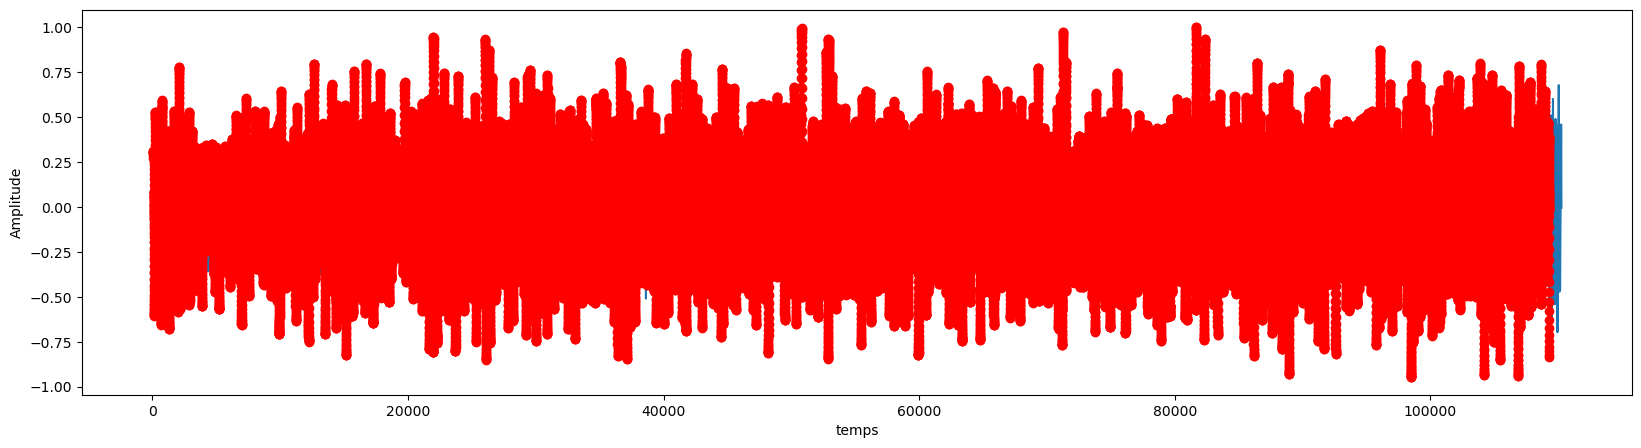

0.4899863945578231
473
277
234
124
89
186
201
37
90
56
39
6
36
61
2
128
61
2
203
109
2
41
113
60
121
True


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, b

In [61]:
#start_time = time.time()
fichieraudio='Donne\\ambre_200.wav'
sound=get_sound_data_with_sample_rate(fichieraudio)
sound_filtred=filtrage(sound)
sound_normalized=normalisation(sound_filtred)
all_peaks_pred,all_position_pred= detecte_peaks_pred(sound_normalized)

all_segment_pred=[]
all_y_segment_pred=[]
all_segment_pred=all_window_pred(all_peaks_pred,all_position_pred,sound_normalized)
for_pred=[]
modulo=[]
ecart_temps=[]
print(f'{len(all_segment_pred)} COUPS')
visualiser(all_segment_pred,sound_normalized)
print(np.mean(sound_normalized>0))
for i in range(len(all_segment_pred)):
    try :
        ecart_temps.append(all_segment_pred[i][-1]-all_segment_pred[1+i][0])
        #if len(al_seg_snd):
        print(abs(ecart_temps[i]))
    except:
        pass
#confirmation.append(True)
#print(confirmation)
#if len(confirmation)==5:
#param_extract()
#confirmation=[]
for i in range(len(all_y_segment_pred)):
    to_append=[]
    tab_mfcc=[]
    param=[]
    y=all_y_segment_pred[i]
    sr=22050
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    for e in mfcc:
        tab_mfcc.append(f'{np.mean(e)}')
    to_append=[np.mean(chroma_stft), np.mean(rmse) ,np.mean(spec_cent), np.mean(spec_bw) ,np.mean(rolloff), np.mean(zcr)]
    param= to_append+tab_mfcc
    for_pred.append(param)
resultat=[]
table_pred=[]
for i in range(len(for_pred)):
    table_pred=np.array(for_pred[i]).reshape(1,26) # convertir le résultat d'extraction des caractéristique en tableau de 1 ligne 26 colonne
    resultat.append(model.predict(table_pred)) # prediction
result = any(resultat) # s'il existe au moins 1 True, retourn True, s'il n' y a pas de true , retourne false
print(result)

In [55]:
def visualiser(all_segment,all_normalised):
    try :
        seg=np.array(all_segment)
        plt.figure(figsize=(20, 5))
        plt.plot(all_normalised)
        plt.plot(seg,all_normalised[seg],'ro')
        plt.xlabel('temps')
        plt.ylabel('Amplitude')
        plt.show()
    except :
        print(f'ERREUR')

In [47]:
all_peaks_pred=[]
all_position_pred=[]
fichieraudio='Recordings\\62m.wav'
sound=get_sound_data_with_sample_rate(fichieraudio)
sound_filtred=filtrage(sound)
sound_normalized=normalisation(sound_filtred)
all_peaks_pred,all_position_pred= detecte_peaks_pred(sound_normalized)

In [39]:
np.max(np.abs(sound))

0.23170432

In [48]:
len(sound)

532493